In [24]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [8]:
#We used latin1 (also known as ISO-8859-1) encoding because your file contains
#characters that aren’t compatible with UTF-8,which is the default encoding used by pandas.read_csv().
df = pd.read_csv("all-data.csv", encoding="latin1", header=None)
df.columns = ['sentiment', 'headline']

# Display a few rows
print(df.head(10))


  sentiment                                           headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
5  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6  positive  For the last quarter of 2010 , Componenta 's n...
7  positive  In the third quarter of 2010 , net sales incre...
8  positive  Operating profit rose to EUR 13.1 mn from EUR ...
9  positive  Operating profit totalled EUR 21.1 mn , up fro...


In [10]:
stopwords = set([
    'a', 'an', 'the', 'and', 'or', 'is', 'are', 'was', 'were', 'in', 'on', 'at',
    'for', 'to', 'from', 'with', 'of', 'this', 'that', 'it', 'as', 'by', 'has',
    'have', 'had', 'but', 'be', 'will', 'would', 'can', 'could', 'i', 'you', 'he',
    'she', 'they', 'we', 'us', 'them', 'his', 'her', 'their', 'my', 'your', 'not'
])

In [16]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special chars, punctuation, digits
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]  # Remove stopwords
    return ' '.join(tokens)

# Apply cleaning
df['clean_headline'] = df['headline'].apply(clean_text)

# Preview cleaned data
print(df[['headline', 'clean_headline']].head())


                                            headline  \
0  According to Gran , the company has no plans t...   
1  Technopolis plans to develop in stages an area...   
2  The international electronic industry company ...   
3  With the new production plant the company woul...   
4  According to the company 's updated strategy f...   

                                      clean_headline  
0  according gran company no plans move all produ...  
1  technopolis plans develop stages area no less ...  
2  international electronic industry company elco...  
3  new production plant company increase its capa...  
4  according company s updated strategy years bas...  


In [46]:
# Split data
X = df['clean_headline']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # You can tune this
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


📊 Classification Report: Logistic Regression

              precision    recall  f1-score   support

    negative       0.90      0.51      0.65       110
     neutral       0.75      0.95      0.84       571
    positive       0.81      0.50      0.62       289

    accuracy                           0.77       970
   macro avg       0.82      0.65      0.70       970
weighted avg       0.78      0.77      0.75       970



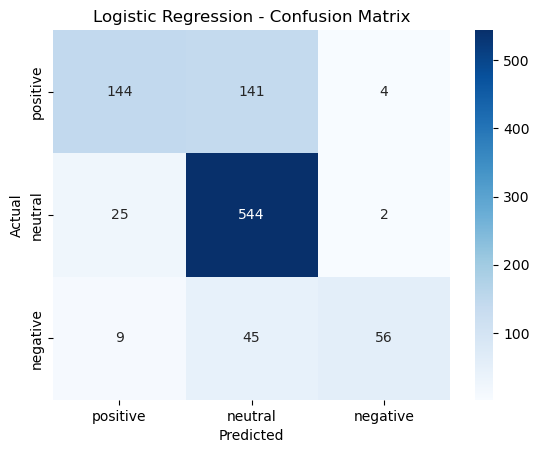

In [36]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_vec, y_train)
y_pred_logreg = logreg.predict(X_test_vec)

print("\n📊 Classification Report: Logistic Regression\n")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=['positive', 'neutral', 'negative'])
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



📊 Classification Report: SVM

              precision    recall  f1-score   support

    negative       0.81      0.61      0.69       110
     neutral       0.78      0.92      0.84       571
    positive       0.79      0.56      0.65       289

    accuracy                           0.78       970
   macro avg       0.79      0.70      0.73       970
weighted avg       0.78      0.78      0.77       970



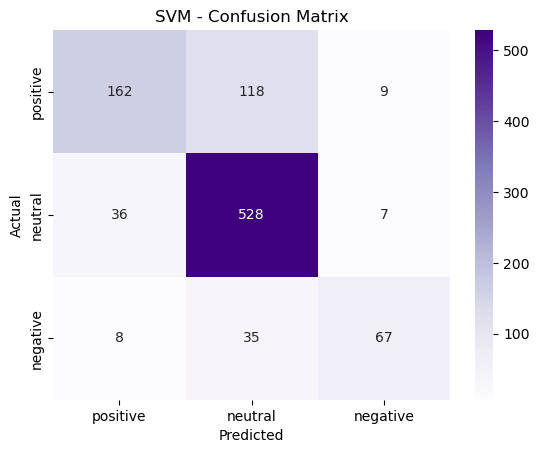

In [42]:
# SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_vec, y_train)
y_pred_svm = svm.predict(X_test_vec)

print("\n📊 Classification Report: SVM\n")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=['positive', 'neutral', 'negative'])
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



📊 Classification Report: Naive Bayes

              precision    recall  f1-score   support

    negative       1.00      0.16      0.28       110
     neutral       0.70      0.97      0.81       571
    positive       0.69      0.37      0.48       289

    accuracy                           0.70       970
   macro avg       0.80      0.50      0.53       970
weighted avg       0.73      0.70      0.65       970



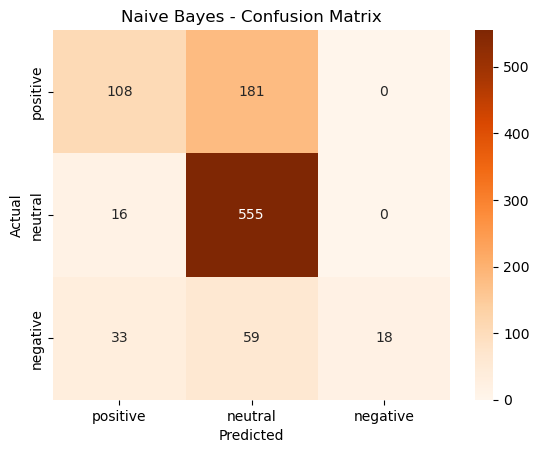

In [44]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

print("\n📊 Classification Report: Naive Bayes\n")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=['positive', 'neutral', 'negative'])
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



📊 Classification Report: Random Forest

              precision    recall  f1-score   support

    negative       0.78      0.51      0.62       110
     neutral       0.75      0.95      0.84       571
    positive       0.80      0.49      0.61       289

    accuracy                           0.76       970
   macro avg       0.78      0.65      0.69       970
weighted avg       0.77      0.76      0.74       970



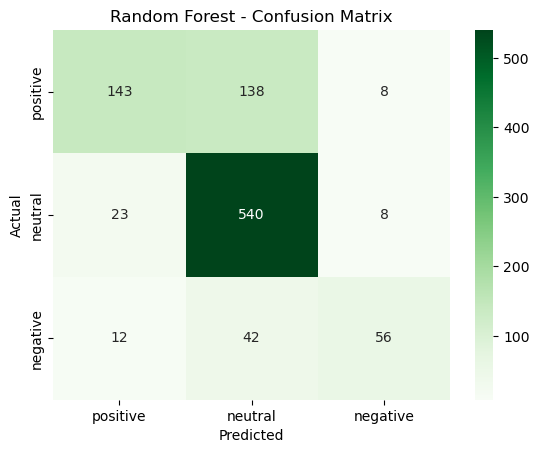

In [26]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

print("\n📊 Classification Report: Random Forest\n")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['positive', 'neutral', 'negative'])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:05:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Classification Report: XGBoost

              precision    recall  f1-score   support

    negative       0.82      0.59      0.69       110
     neutral       0.77      0.92      0.84       571
    positive       0.78      0.58      0.66       289

    accuracy                           0.78       970
   macro avg       0.79      0.69      0.73       970
weighted avg       0.78      0.78      0.77       970



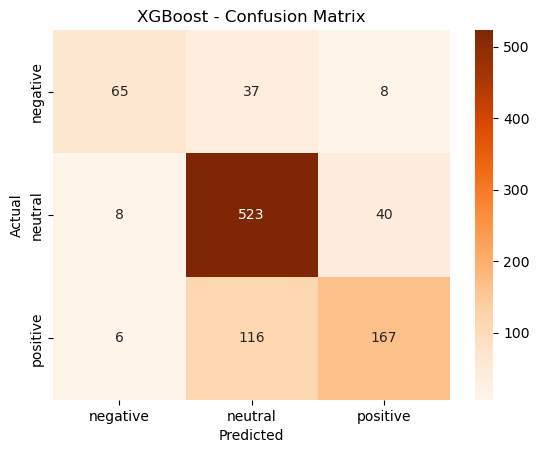

In [32]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_vec, y_train_enc)
y_pred_xgb_enc = xgb.predict(X_test_vec)

# Decode predictions back to original labels
y_pred_xgb = le.inverse_transform(y_pred_xgb_enc)

# Evaluation
print("\n📊 Classification Report: XGBoost\n")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=le.classes_)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [48]:
from sklearn.metrics import accuracy_score

accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
}


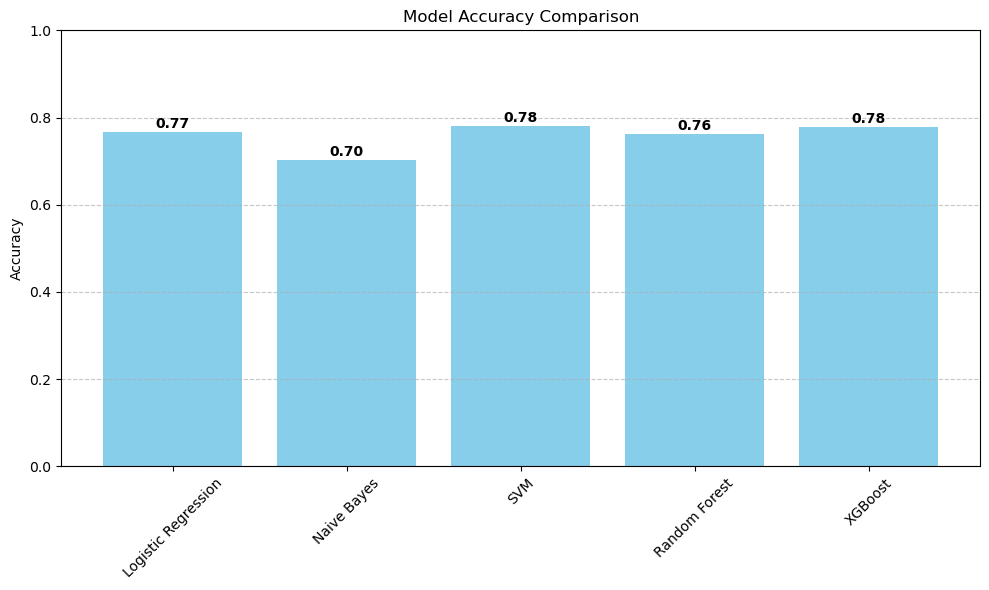

In [50]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [54]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 412.7 kB/s eta 0:00:00a 0:00:01


In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [60]:
print(df.columns)


Index(['sentiment', 'headline', 'clean_headline'], dtype='object')


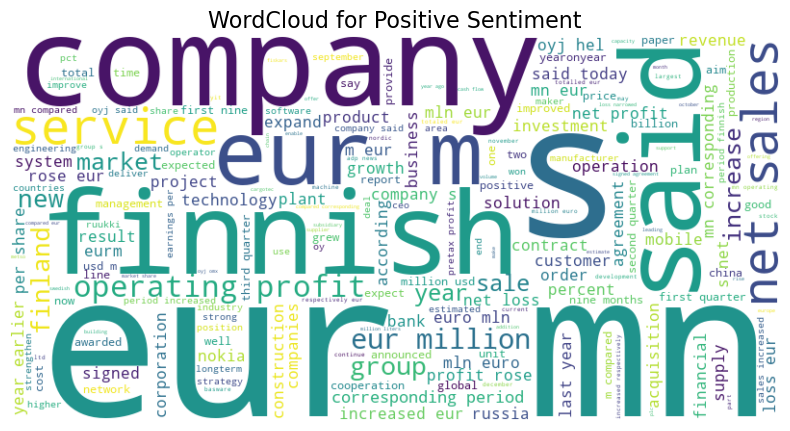

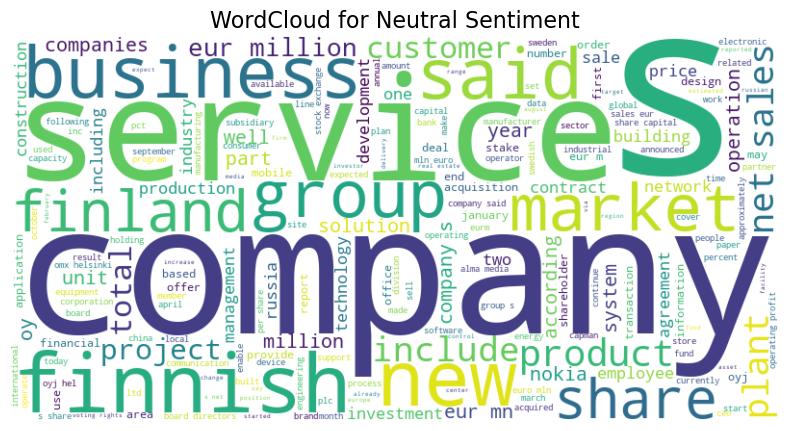

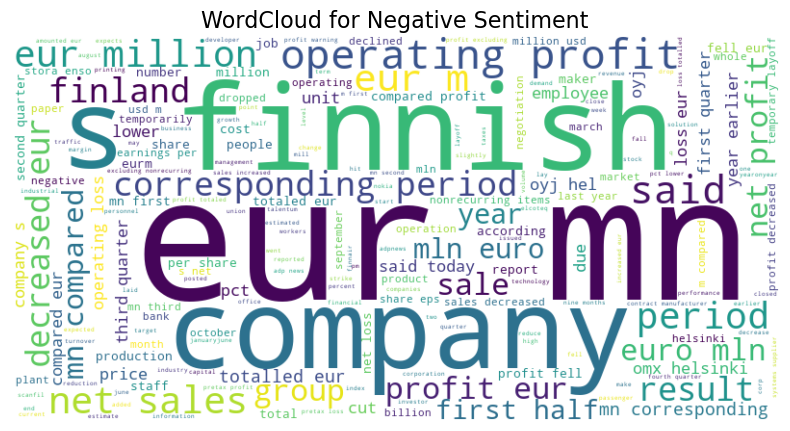

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_headline'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment.capitalize()} Sentiment", fontsize=16)
    plt.show()

# Generate word clouds
for sentiment in ['positive', 'neutral', 'negative']:
    generate_wordcloud(sentiment)


Insights from Word Clouds
Common Words Across Sentiments:

Words like "company," "eur," "mn," and "finnish" are central to all sentiments, showing they are common context words in financial headlines.

Positive Sentiment:

Words like "sales," "net," and "profit" are prominent — indicating that positive news tends to focus on earnings, growth, or performance.

Neutral Sentiment:

Keywords like "services," "group," "market," and "business" dominate — often associated with announcements, partnerships, or neutral updates.

Negative Sentiment:

Strong emphasis on "decreased," "declined," "loss," and "compared" — pointing toward comparative analysis or negative earnings results.

/var/folders/pk/wshkb_xj3r198l0yxrzjqsvh0000gn/T/ipykernel_15416/3894940898.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


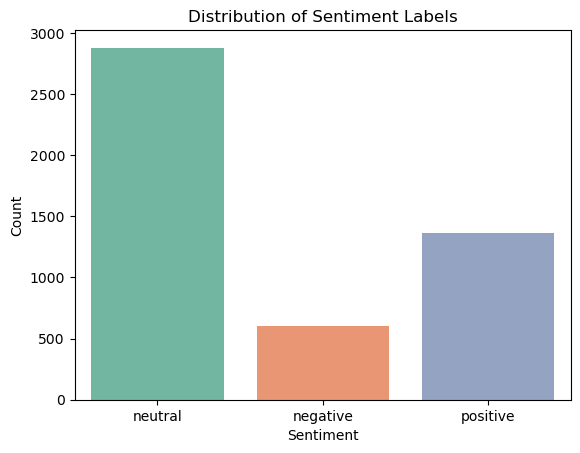

In [65]:
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [67]:
from collections import Counter

# Function to get top 10 words for a given sentiment
def get_top_words(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_headline'])
    words = text.split()
    word_freq = Counter(words)
    return word_freq.most_common(10)

# Display top 10 words per sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    top_words = get_top_words(sentiment)
    print(f"\n🔹 Top 10 Words for '{sentiment.capitalize()}' Sentiment:")
    for word, freq in top_words:
        print(f"{word}: {freq}")



🔹 Top 10 Words for 'Positive' Sentiment:
eur: 595
s: 329
mn: 262
its: 257
company: 240
said: 230
finnish: 198
net: 196
sales: 192
profit: 191

🔹 Top 10 Words for 'Neutral' Sentiment:
s: 616
company: 508
eur: 315
its: 309
said: 237
finland: 219
finnish: 215
million: 193
business: 190
group: 187

🔹 Top 10 Words for 'Negative' Sentiment:
eur: 400
mn: 237
profit: 156
s: 111
net: 104
company: 100
finnish: 99
sales: 98
operating: 97
period: 88


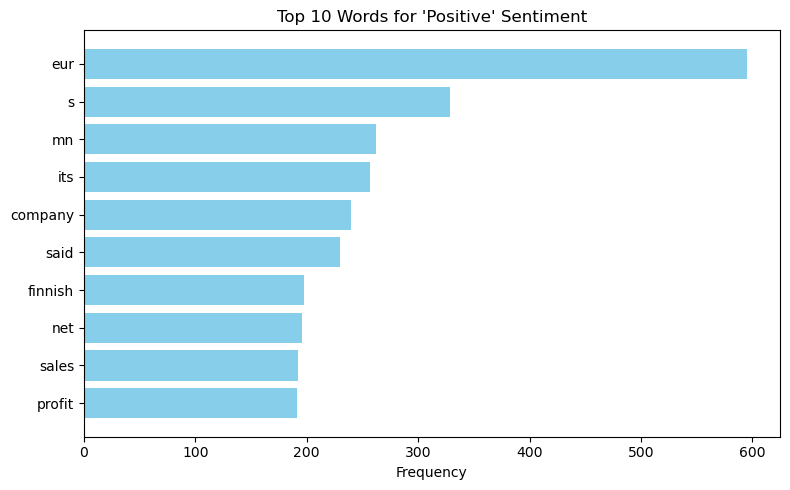

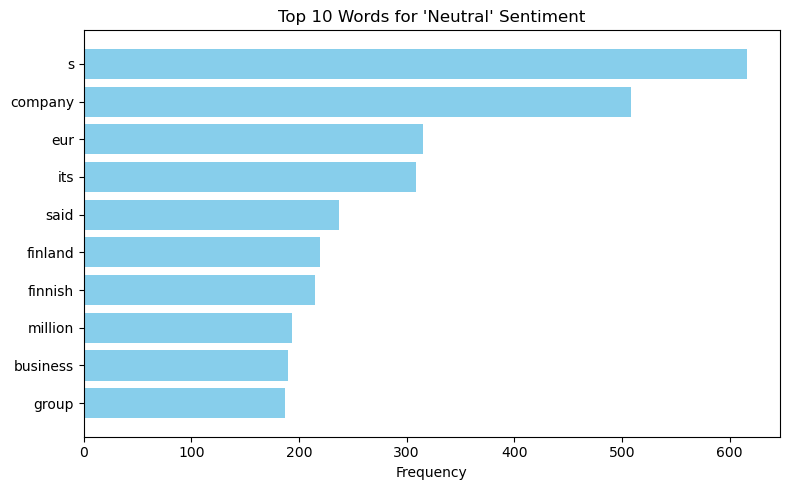

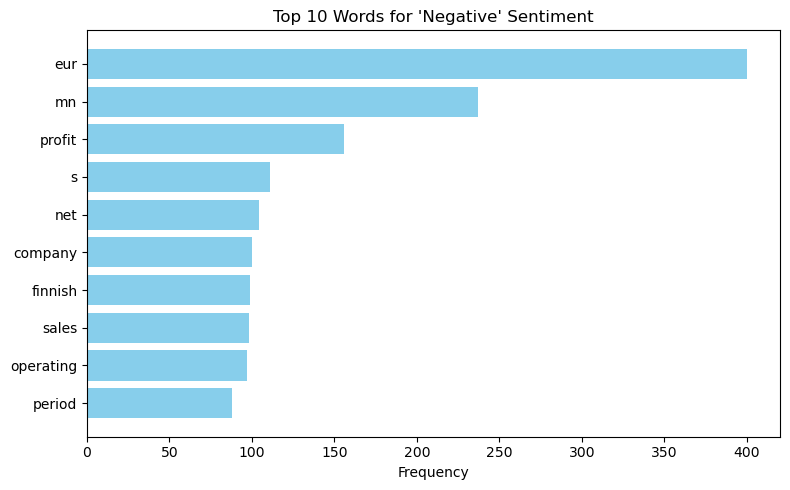

In [69]:
import matplotlib.pyplot as plt

# Function to plot top 10 words for each sentiment
def plot_top_words(sentiment):
    top_words = get_top_words(sentiment)
    words, freqs = zip(*top_words)
    
    plt.figure(figsize=(8, 5))
    plt.barh(words, freqs, color='skyblue')
    plt.gca().invert_yaxis()  # Highest freq on top
    plt.title(f"Top 10 Words for '{sentiment.capitalize()}' Sentiment")
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.show()

# Plotting for all sentiments
for sentiment in ['positive', 'neutral', 'negative']:
    plot_top_words(sentiment)
